# Analysis Report
## Paul Keren
### 11/22/2024
The hypothesis that I am testing is if that with songs that are regarded as generally happy songs, that even though they are voted on as a happy song it might not be reflected in a vizualition feature. The hypothesis I have for this report is that the energy of a song relates to the views people have on it, more energy = more people find the song happier. 

The Spotify endpoints I will be using to collect my data are the tracks, features, and albums. The responses I will be using are the valence, energy, and danceability of a track, these respones are suitable for this project because valence measures the musical positiveness in a track so it is a good endpoint to use to test which of the tracks is the most happy. For the vizualations I will be using valence as the main variable to measure the positiveness, along with the above mention variables to see if any of them correlate. 

In [56]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    
    response = requests.post(url, 
                            data = data,
                           headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [58]:
keys = pd.read_csv("Keys.txt")

In [59]:
access_token = get_session_token(keys['Client_ID'].iloc[0],keys['Client_Secret'].iloc[0])

200


The access token ^

In [60]:
access_token

'BQC67YqoXd_n_IvZPoa6ib1XtKUmOXUgSOQzcL_dlbspO4ELFBbLxxFBl1zFpTDpE1xhwgfNhBMAE8jbS06qB5MqmFuTXVNTsSAaTZdkl4IWpX3fIvk'

In [61]:
t_features_ep = 'https://api.spotify.com/v1/audio-features/'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [62]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [63]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [64]:
hy_album_id = '0jVGdTKQ0pValbbtxv5h5O'
hy2_album_id = '1FVsTVNu2YGVYcOjY7VtHk'

In [65]:
ab_tracks_ep.format(hy_album_id)

'https://api.spotify.com/v1/albums/0jVGdTKQ0pValbbtxv5h5O/tracks'

In [66]:
hy_album_response = api_call(ab_tracks_ep.format(hy_album_id) , session_header)
hy2_album_response = api_call(ab_tracks_ep.format(hy2_album_id) , session_header)

200
200


In [67]:
hy_album_df = pd.DataFrame(hy_album_response['items'])
hy2_album_df = pd.DataFrame(hy2_album_response['items']) 
#hy_album_df.head()

In [68]:
hy_track_ids = ','.join(hy_album_df['id'].to_list())
hy2_track_ids = ','.join(hy2_album_df['id'].to_list())

In [69]:
t_features_ep + '?ids={}'.format(hy_track_ids)

'https://api.spotify.com/v1/audio-features/?ids=1huwecVUu6sWgU7o7GHPHQ,2IoU47UbLPu8LX3eAnK7mj,6ZPg2irmu84pBiLUPBSR87,0Ad6w4dXEF0OI3HnZQNuuf,5GtQkJTQ01zxZ9xRuIBRyY,2b80sCsAwCpdWWMdcQYf7s,7fsLtpbscBZUQntENqmR1S,2B9rafHNGPpnaAtqTcbrFL,62tQ11UnK9za7j0dyqT7Hs,6ODJxBvPLPRgKUVFOHClqb,29TUsmgNleSNV7pDAuMpiD,2gEkq0Mrrd6sKUkBnxWqDq,0bP2WhCT0F2pA0vjqaiDSk,0cDbVbHEUM419vxXxigLtS,3IL9TPElS6uk1tgiKEUVie,6TFr1fKugaFyGF7hzH2XQo,6dzH7tWblVkIVRVdFL7sS4,2SMH7dslMqZLscuNIaIsLI,4WPcZxkaJJxAZcbuIVWbhK,51c0YDa7BZUiT79IwDZVkj'

In [70]:
hy_track_features = api_call(t_features_ep + '?ids={}'.format(hy_track_ids), 
                             session_header)
hy2_track_features = api_call(t_features_ep + '?ids={}'.format(hy2_track_ids), 
                             session_header)

200
200


In [71]:
hy_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(hy_track_ids), 
                             session_header)
hy2_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(hy2_track_ids), 
                             session_header)

200
200


In [72]:
hy_features_df = pd.DataFrame(hy_track_features['audio_features'])
hy2_features_df = pd.DataFrame(hy2_track_features['audio_features'])
hy_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.647,0.823,5,-4.662,0,0.1840,0.22000,0.000000,0.0908,0.962,160.023,audio_features,1huwecVUu6sWgU7o7GHPHQ,spotify:track:1huwecVUu6sWgU7o7GHPHQ,https://api.spotify.com/v1/tracks/1huwecVUu6sW...,https://api.spotify.com/v1/audio-analysis/1huw...,232720,4
1,0.853,0.681,0,-5.003,1,0.0888,0.00966,0.000057,0.0233,0.930,114.989,audio_features,2IoU47UbLPu8LX3eAnK7mj,spotify:track:2IoU47UbLPu8LX3eAnK7mj,https://api.spotify.com/v1/tracks/2IoU47UbLPu8...,https://api.spotify.com/v1/audio-analysis/2IoU...,270627,4
2,0.652,0.749,0,-5.248,1,0.0886,0.08480,0.000000,0.6040,0.651,94.103,audio_features,6ZPg2irmu84pBiLUPBSR87,spotify:track:6ZPg2irmu84pBiLUPBSR87,https://api.spotify.com/v1/tracks/6ZPg2irmu84p...,https://api.spotify.com/v1/audio-analysis/6ZPg...,267413,4
3,0.637,0.876,5,-5.269,1,0.0366,0.07240,0.000000,0.2150,0.433,116.943,audio_features,0Ad6w4dXEF0OI3HnZQNuuf,spotify:track:0Ad6w4dXEF0OI3HnZQNuuf,https://api.spotify.com/v1/tracks/0Ad6w4dXEF0O...,https://api.spotify.com/v1/audio-analysis/0Ad6...,235733,4
4,0.595,0.858,4,-3.555,0,0.0345,0.02110,0.017500,0.1410,0.737,127.949,audio_features,5GtQkJTQ01zxZ9xRuIBRyY,spotify:track:5GtQkJTQ01zxZ9xRuIBRyY,https://api.spotify.com/v1/tracks/5GtQkJTQ01zx...,https://api.spotify.com/v1/audio-analysis/5GtQ...,222533,4


In [73]:
hy_tracks_df = pd.DataFrame(hy_track_info['tracks'])
hy2_tracks_df = pd.DataFrame(hy2_track_info['tracks'])
hy_tracks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri,linked_from
0,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,1,232720,False,{'isrc': 'USQ4E1300686'},{'spotify': 'https://open.spotify.com/track/1h...,https://api.spotify.com/v1/tracks/1huwecVUu6sW...,1huwecVUu6sWgU7o7GHPHQ,False,True,"Happy - From ""Despicable Me 2""",29,https://p.scdn.co/mp3-preview/7df50d6478d9366d...,1,track,spotify:track:1huwecVUu6sWgU7o7GHPHQ,NaN
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,1,270626,True,{'isrc': 'GBARL1401524'},{'spotify': 'https://open.spotify.com/track/2I...,https://api.spotify.com/v1/tracks/2IoU47UbLPu8...,2IoU47UbLPu8LX3eAnK7mj,False,True,Uptown Funk (feat. Bruno Mars),31,https://p.scdn.co/mp3-preview/6b518c4b49482770...,2,track,spotify:track:2IoU47UbLPu8LX3eAnK7mj,NaN
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,1,267413,False,{'isrc': 'USSM11102908'},{'spotify': 'https://open.spotify.com/track/6Z...,https://api.spotify.com/v1/tracks/6ZPg2irmu84p...,6ZPg2irmu84pBiLUPBSR87,False,True,Love On Top,22,https://p.scdn.co/mp3-preview/b33aaf728bc4a935...,3,track,spotify:track:6ZPg2irmu84pBiLUPBSR87,NaN
3,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,1,235733,False,{'isrc': 'USSM11401744'},{'spotify': 'https://open.spotify.com/track/0A...,https://api.spotify.com/v1/tracks/0Ad6w4dXEF0O...,0Ad6w4dXEF0OI3HnZQNuuf,False,True,Love Never Felt So Good,19,https://p.scdn.co/mp3-preview/84840c0327e036ed...,4,track,spotify:track:0Ad6w4dXEF0OI3HnZQNuuf,NaN
4,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,1,222533,False,{'isrc': 'GBARL1400296'},{'spotify': 'https://open.spotify.com/track/5G...,https://api.spotify.com/v1/tracks/5GtQkJTQ01zx...,5GtQkJTQ01zxZ9xRuIBRyY,False,True,Summer,31,https://p.scdn.co/mp3-preview/f8877a2ec4963cb1...,5,track,spotify:track:5GtQkJTQ01zxZ9xRuIBRyY,NaN


In [74]:
hy_merged = pd.merge(hy_features_df, hy_tracks_df,
         how = 'inner', on = 'id')
hy_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,linked_from
0,0.647,0.823,5,-4.662,0,0.1840,0.22000,0.000000,0.0908,0.962,...,https://api.spotify.com/v1/tracks/1huwecVUu6sW...,False,True,"Happy - From ""Despicable Me 2""",29,https://p.scdn.co/mp3-preview/7df50d6478d9366d...,1,track,spotify:track:1huwecVUu6sWgU7o7GHPHQ,NaN
1,0.853,0.681,0,-5.003,1,0.0888,0.00966,0.000057,0.0233,0.930,...,https://api.spotify.com/v1/tracks/2IoU47UbLPu8...,False,True,Uptown Funk (feat. Bruno Mars),31,https://p.scdn.co/mp3-preview/6b518c4b49482770...,2,track,spotify:track:2IoU47UbLPu8LX3eAnK7mj,NaN
2,0.652,0.749,0,-5.248,1,0.0886,0.08480,0.000000,0.6040,0.651,...,https://api.spotify.com/v1/tracks/6ZPg2irmu84p...,False,True,Love On Top,22,https://p.scdn.co/mp3-preview/b33aaf728bc4a935...,3,track,spotify:track:6ZPg2irmu84pBiLUPBSR87,NaN
3,0.637,0.876,5,-5.269,1,0.0366,0.07240,0.000000,0.2150,0.433,...,https://api.spotify.com/v1/tracks/0Ad6w4dXEF0O...,False,True,Love Never Felt So Good,19,https://p.scdn.co/mp3-preview/84840c0327e036ed...,4,track,spotify:track:0Ad6w4dXEF0OI3HnZQNuuf,NaN
4,0.595,0.858,4,-3.555,0,0.0345,0.02110,0.017500,0.1410,0.737,...,https://api.spotify.com/v1/tracks/5GtQkJTQ01zx...,False,True,Summer,31,https://p.scdn.co/mp3-preview/f8877a2ec4963cb1...,5,track,spotify:track:5GtQkJTQ01zxZ9xRuIBRyY,NaN


In [75]:
hy_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'linked_from'],
      dtype='object')

In [76]:
hy2_merged = pd.merge(hy2_features_df, hy2_tracks_df,
                     how = 'inner', on = 'id')
hy_merged['artist'] = "Various Artists"
hy2_merged['artist'] = "Multiple Artists"
hy2_merged.shape

(20, 35)

In [77]:
artist_compare = pd.concat([hy_merged, hy2_merged], axis = 0)
artist_compare

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,linked_from,artist
0,0.647,0.823,5,-4.662,0,0.1840,0.220000,0.000000,0.0908,0.962,...,False,True,"Happy - From ""Despicable Me 2""",29,https://p.scdn.co/mp3-preview/7df50d6478d9366d...,1,track,spotify:track:1huwecVUu6sWgU7o7GHPHQ,NaN,Various Artists
1,0.853,0.681,0,-5.003,1,0.0888,0.009660,0.000057,0.0233,0.930,...,False,True,Uptown Funk (feat. Bruno Mars),31,https://p.scdn.co/mp3-preview/6b518c4b49482770...,2,track,spotify:track:2IoU47UbLPu8LX3eAnK7mj,NaN,Various Artists
2,0.652,0.749,0,-5.248,1,0.0886,0.084800,0.000000,0.6040,0.651,...,False,True,Love On Top,22,https://p.scdn.co/mp3-preview/b33aaf728bc4a935...,3,track,spotify:track:6ZPg2irmu84pBiLUPBSR87,NaN,Various Artists
3,0.637,0.876,5,-5.269,1,0.0366,0.072400,0.000000,0.2150,0.433,...,False,True,Love Never Felt So Good,19,https://p.scdn.co/mp3-preview/84840c0327e036ed...,4,track,spotify:track:0Ad6w4dXEF0OI3HnZQNuuf,NaN,Various Artists
4,0.595,0.858,4,-3.555,0,0.0345,0.021100,0.017500,0.1410,0.737,...,False,True,Summer,31,https://p.scdn.co/mp3-preview/f8877a2ec4963cb1...,5,track,spotify:track:5GtQkJTQ01zxZ9xRuIBRyY,NaN,Various Artists
5,0.606,0.720,5,-6.253,0,0.0283,0.000149,0.001650,0.0745,0.178,...,False,True,All of Me - Tiësto's Birthday Treatment Remix ...,18,https://p.scdn.co/mp3-preview/976862b21ada9ab2...,6,track,spotify:track:2b80sCsAwCpdWWMdcQYf7s,NaN,Various Artists
6,0.654,0.868,1,-3.053,1,0.0458,0.025600,0.000000,0.0766,0.542,...,False,True,Best Song Ever,21,https://p.scdn.co/mp3-preview/41868c3ce389ff76...,7,track,spotify:track:7fsLtpbscBZUQntENqmR1S,NaN,Various Artists
7,0.811,0.879,9,-3.724,1,0.0513,0.047600,0.000002,0.1090,0.962,...,False,True,All About That Bass,17,https://p.scdn.co/mp3-preview/9517f6a04eaa56dd...,8,track,spotify:track:2B9rafHNGPpnaAtqTcbrFL,NaN,Various Artists
8,0.700,0.747,5,-3.453,1,0.0964,0.274000,0.000000,0.4860,0.683,...,False,True,Bills,20,https://p.scdn.co/mp3-preview/5841a9ea6571e400...,9,track,spotify:track:62tQ11UnK9za7j0dyqT7Hs,NaN,Various Artists
9,0.827,0.580,4,-7.793,1,0.0374,0.179000,0.030100,0.0699,0.381,...,False,True,Cheerleader (Felix Jaehn Remix) - Radio Edit,18,https://p.scdn.co/mp3-preview/b18fa4a865ff7b43...,10,track,spotify:track:6ODJxBvPLPRgKUVFOHClqb,NaN,Various Artists


In [78]:
name_valence_energy_danceability = hy_merged[["name", "valence", "energy", "danceability", "popularity"]]

In [79]:
name_valence_energy_danceability.head(30)

,name,valence,energy,danceability,popularity
0,"Happy - From ""Despicable Me 2""",0.962,0.823,0.647,29
1,Uptown Funk (feat. Bruno Mars),0.930,0.681,0.853,31
2,Love On Top,0.651,0.749,0.652,22
3,Love Never Felt So Good,0.433,0.876,0.637,19
4,Summer,0.737,0.858,0.595,31
5,All of Me - Tiësto's Birthday Treatment Remix ...,0.178,0.720,0.606,18
6,Best Song Ever,0.542,0.868,0.654,21
7,All About That Bass,0.962,0.879,0.811,17
8,Bills,0.683,0.747,0.700,20
9,Cheerleader (Felix Jaehn Remix) - Radio Edit,0.381,0.580,0.827,18


Wrangled data frames we are looking at

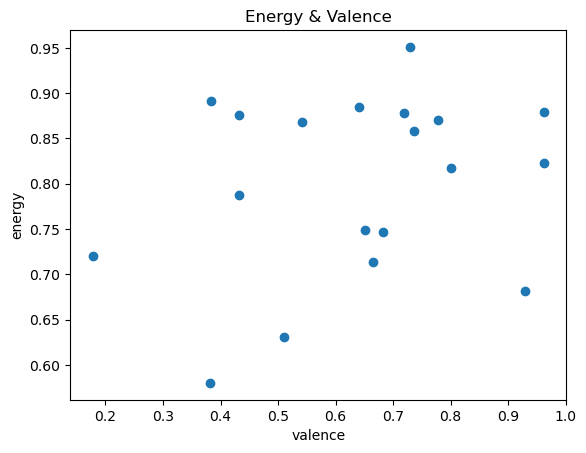

In [85]:
fig1, ax1 = plt.subplots()
ax1.scatter(hy_merged['valence'], hy_merged['energy'],)
ax1.set_xlabel('valence')
ax1.set_ylabel('energy')
ax1.set_title('Energy & Valence')
plt.show()

By examing this scatter plot, you see most of these songs have an energy higher than 0.80. Along with that the valence on the high energy songs correlates a touch with having 5 songs over 0.7 valence and over 0.80 energy.

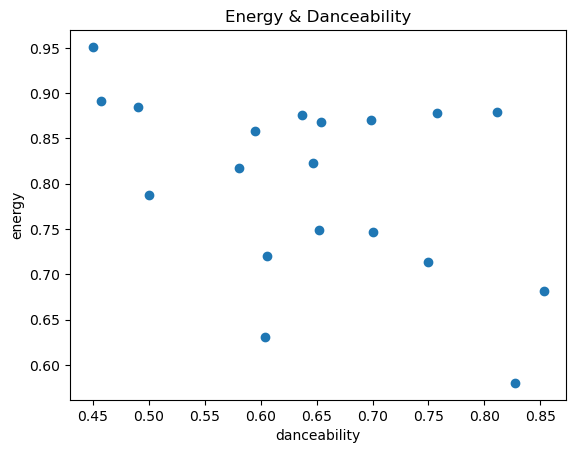

In [86]:
fig2, ax2 = plt.subplots()
ax2.scatter(hy_merged['danceability'], hy_merged['energy'],)
ax2.set_xlabel('danceability')
ax2.set_ylabel('energy')
ax2.set_title('Energy & Danceability')
plt.show()

Another hypothesis I had was that the more energy a song had, the more danceable it would be. After looking at this visual though that does not seem like the case at all. 

In [82]:
valence_desc = stats.describe(hy_merged['valence'])

In [83]:
valence_desc.mean

0.6377894736842106

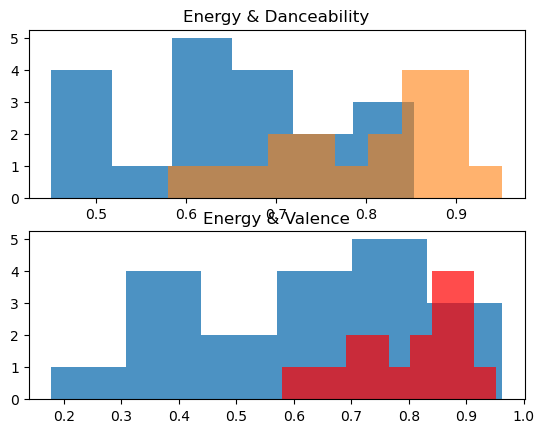

In [89]:
fig4, ax4 = plt.subplots(2)
ax4[0].hist(hy_merged['danceability'], alpha = .8,  bins = 6)
ax4[0].hist(hy_merged['energy'], alpha = .6 )
ax4[0].set_title('Energy & Danceability')
ax4[1].hist(hy_merged['valence'], alpha = .8, bins = 6)
ax4[1].hist(hy_merged['energy'], alpha = .7, color = 'red')
ax4[1].set_title('Energy & Valence')
plt.show()

In the bottom graph is another look at the correlation of valence and energy, the energy being in red and the valence in blue. When looking at that graph though it is hard to deny that there is a correlation between the energy and valence of a song. 

There are a couple conclusions we can draw from this data and visualization, the first being that there is definitely a correlation between the energy of a song and the valence of a song. In the scatter plot labeled energy & valence there is evidence of tracks having higher energy will also have a higher valence, now if you look down to histogram also labeled energy & valence you can see the energy and valence co-existing nicely. Going up to the scatter plot labeled energy & danceability, you can see there that there is a regression surprisingly. One of theories was that the more energy a song had the more danceable it would be too, almost the opposite is reflected in that graph and in the histogram also displaying these results.

With this data there is always limitations, the first being that we can't test every single song in existence on whether the energy and valence line up. The other being that this data is based off of the api endpoints and some human reactions could be the same as this but some could oppose these views. The future directions I believe would be testing more tracks or albums that are regarded as up-lifting or happy to the general public and seeing if this data matches. An alternative approach to this data gathering could be trying to find another correlation between valence and another variable to see if there are any other better examples to show. 